Some Basics on Statistics (iPython Notebook)
======================================

Statistics: Inferring results about a population given a sample

## Coin Toss

You toss a coin 30 times and see head 24 times. Is it a fair coin?

**Hypothesis 1**: Tossing a fair coin will get you 15 heads in 30 tosses. This coin is biased

**Hypothesis 2**: Come on, even a fair coin could show 24 heads in 30 tosses. This is just by chance


#### Hacker's Approach

Simulation. Run the experiment 100,000 times. Find the percentage of times the experiment returned 24 or more heads. If it is more than 5%, we conclude that the coin is biased.


#### Statistical Method

**What is the probability of getting 24 heads in 30 tosses ?**

It is the probability of getting heads 24 times or more.

In [1]:
# we need some library (numpy) for maths
import numpy as np

total_tosses = 30
num_heads = 24
prob_head = 0.5

# 0 is tail. 1 is heads. Generate one experiment
experiment = np.random.randint(0, 2, total_tosses)
print("Data of the Experiment:", experiment)
# Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1])  # This will give all the heads in the array
head_count = experiment[experiment==1].shape[0] # This will get the count of heads in the array
print("Number of heads in the experiment:", head_count)

Data of the Experiment: [1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1]
Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of heads in the experiment: 16


In [2]:
?np.random.randint

In [3]:
# Now, the above experiment needs to be repeated 100 times. Let's write a function and put the above code in a loop
def coin_toss_experiment(times_to_repeat):

    head_count = np.empty([times_to_repeat, 1], dtype=int)
    
    for times in np.arange(times_to_repeat):
        experiment = np.random.randint(0, 2, total_tosses)
        head_count[times] = experiment[experiment==1].shape[0]
    
    return head_count

In [4]:
head_count = coin_toss_experiment(100)

In [5]:
head_count[:10]

array([[16],
       [13],
       [13],
       [14],
       [19],
       [14],
       [10],
       [14],
       [13],
       [19]])

In [6]:
print("Dimensions:", head_count.shape, "\n","Type of object:", type(head_count))

Dimensions: (100, 1) 
 Type of object: <class 'numpy.ndarray'>


In [7]:
# Let's plot the above distribution (again, libraries are required)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

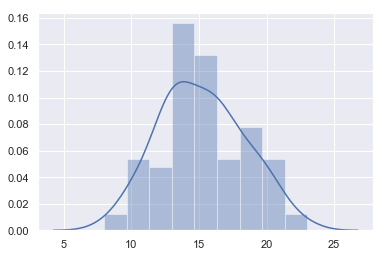

In [8]:
sns.distplot(head_count, kde = True)

In [9]:
# Number of times the experiment returned 20 heads.
head_count[head_count>=20]

array([20, 20, 20, 20, 21, 20, 20, 21, 21, 22, 23])

In [10]:
print("No of times experiment returned 20 heads or more:", head_count[head_count>=20].shape[0])
print("% of times with 20 or more heads: ", head_count[head_count>=20].shape[0]/float(head_count.shape[0])*100)

No of times experiment returned 20 heads or more: 11
% of times with 20 or more heads:  11.0


### Exercise 3.1: Repeat the experiment 100,000 times.

In [11]:
def coin_toss_experiment_2(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    experiment = np.random.randint(0,2,[times_to_repeat,total_tosses])
    return experiment.sum(axis=1)

### Exercise 3.2: Benchmark `coin_toss_experiment` and `coin_toss_experiment_2` for 100 and 100,000 runs and report improvements, if any

## Resambling

### Problem
The number of shoes sold by an e-commerce company during the first three months (12 weeks) of the year were:

23 21 19 24 35 17 18 24 33 27 21 23

Meanwhile, the company developed some dynamic price optimization algorithms and the sales for the next 12 weeks were:

31 28 19 24 32 27 16 41 23 32 29 33

Did the dynamic price optimization algorithm deliver superior results? Can it be trusted?

### Solution

Before we get onto different approaches, let's quickly get a feel for the data

In [12]:
# We are loading libraries again: numpy (maths) an seaborn (diagrams)
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [13]:
# Load the data
before_opt = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
after_opt = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [14]:
before_opt.mean()

23.75

In [15]:
after_opt.mean()

27.916666666666668

In [16]:
# 5-number summary means a bit more effort than e.g. in R
# here: calculate a 5-number summary for before_opt
from numpy import percentile
from numpy.random import rand
# calculate quartiles
quartiles = percentile(before_opt, [25, 50, 75])
# calculate min/max
data_min, data_max = before_opt.min(), before_opt.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 17.000
Q1: 20.500
Median: 23.000
Q3: 24.750
Max: 35.000


### Exercise 3.3: Write a function for the 5-number summary and apply it to both arrays!

In [18]:
observed_difference = after_opt.mean() - before_opt.mean()

In [19]:
print("Difference between the means is:", observed_difference)

Difference between the means is: 4.166666666666668


On average, the sales after optimization is more than the sales before optimization. But is the difference legit? Could it be due to chance?

**Classical Method** : We could cover this method later on. This entails doing a *t-test* (one-sample test)

T-Test: statistical hypothesis test in which the test statistics follows a (Student's)t-distribution under the null hypothesis.

T-distribution: family of distributions that look almost identical to a normal distribution but are a bit shorter or fatter; applicable if sample size is small and the standard deviation of the population is unknown

In [20]:
# Step 1: Create the dataset. Let's give Label 0 to before_opt and Label 1 to after_opt
# Learn about the following three functions

In [21]:
?np.append

In [22]:
?np.zeros

In [23]:
?np.ones

In [24]:
shoe_sales = np.array([np.append(np.zeros(before_opt.shape[0]), np.ones(after_opt.shape[0])),
np.append(before_opt, after_opt)], dtype=int)

In [25]:
print("Shape:", shoe_sales.shape)
print("Data:", "\n", shoe_sales)

Shape: (2, 24)
Data: 
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1]
 [23 21 19 24 35 17 18 24 33 27 21 23 31 28 19 24 32 27 16 41 23 32 29 33]]


In [26]:
shoe_sales = shoe_sales.T
print("Shape:",shoe_sales.shape)
print("Data:", "\n", shoe_sales)

Shape: (24, 2)
Data: 
 [[ 0 23]
 [ 0 21]
 [ 0 19]
 [ 0 24]
 [ 0 35]
 [ 0 17]
 [ 0 18]
 [ 0 24]
 [ 0 33]
 [ 0 27]
 [ 0 21]
 [ 0 23]
 [ 1 31]
 [ 1 28]
 [ 1 19]
 [ 1 24]
 [ 1 32]
 [ 1 27]
 [ 1 16]
 [ 1 41]
 [ 1 23]
 [ 1 32]
 [ 1 29]
 [ 1 33]]


In [27]:
# This is the approach we are going to take
# We are going to randomly shuffle the labels. Then compute the mean between the two groups. 
# Find the % of times when the difference between the means computed is greater than what we observed above
# If the % of times is less than 5%, we would make the call that the improvements are real

In [28]:
np.random.shuffle(shoe_sales)

In [29]:
shoe_sales

array([[ 1, 32],
       [ 0, 19],
       [ 0, 33],
       [ 1, 16],
       [ 1, 24],
       [ 1, 41],
       [ 0, 21],
       [ 0, 17],
       [ 0, 24],
       [ 1, 33],
       [ 1, 27],
       [ 1, 31],
       [ 1, 23],
       [ 0, 24],
       [ 0, 35],
       [ 1, 32],
       [ 0, 27],
       [ 1, 28],
       [ 0, 21],
       [ 1, 19],
       [ 0, 23],
       [ 0, 23],
       [ 0, 18],
       [ 1, 29]])

In [30]:
experiment_label = np.random.randint(0, 2, shoe_sales.shape[0])

In [31]:
experiment_label

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1])

In [32]:
experiment_data = np.array([experiment_label, shoe_sales[:,1]])
experiment_data = experiment_data.T
print(experiment_data)

[[ 0 32]
 [ 1 19]
 [ 1 33]
 [ 1 16]
 [ 1 24]
 [ 1 41]
 [ 1 21]
 [ 1 17]
 [ 1 24]
 [ 1 33]
 [ 0 27]
 [ 0 31]
 [ 0 23]
 [ 1 24]
 [ 1 35]
 [ 1 32]
 [ 0 27]
 [ 0 28]
 [ 0 21]
 [ 0 19]
 [ 0 23]
 [ 0 23]
 [ 0 18]
 [ 1 29]]


In [33]:
experiment_diff_mean =  experiment_data[experiment_data[:,0]==1].mean() \
                        - experiment_data[experiment_data[:,0]==0].mean()

In [34]:
experiment_diff_mean

1.5209790209790217

In [35]:
# Like the intro, let's repeat this experiment 100 and then 100000 times

In [36]:
def shuffle_experiment(number_of_times):
    experiment_diff_mean = np.empty([number_of_times,1])
    for times in np.arange(number_of_times):
        experiment_label = np.random.randint(0, 2, shoe_sales.shape[0])
        experiment_data = np.array([experiment_label, shoe_sales[:,1]]).T
        experiment_diff_mean[times] =  experiment_data[experiment_data[:,0]==1].mean() \
                        - experiment_data[experiment_data[:,0]==0].mean()
    return experiment_diff_mean

In [37]:
experiment_diff_mean = shuffle_experiment(100)

In [38]:
experiment_diff_mean[:10]

array([[ 0.76573427],
       [-1.03125   ],
       [ 1.07342657],
       [ 0.41666667],
       [ 0.82167832],
       [ 1.07142857],
       [-2.47777778],
       [-0.16666667],
       [ 0.58333333],
       [ 0.08333333]])

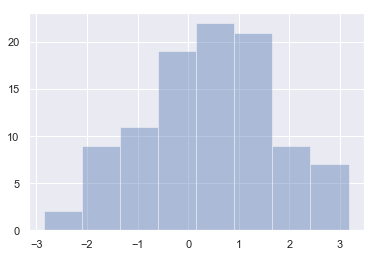

In [39]:
sns.distplot(experiment_diff_mean, kde=False)

In [40]:
# Finding % of times difference of means is greater than observed
print("Data: Difference in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference])

print("Number of times diff in mean greater than observed:", \
            experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0])
print("% of times diff in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0]/float(experiment_diff_mean.shape[0])*100)

Data: Difference in mean greater than observed: []
Number of times diff in mean greater than observed: 0
% of times diff in mean greater than observed: 0.0


### Exercise 3.4: Repeat the above for 100,000 runs and report the results

### Exercise 3.5: Apply the t-test method to another data-set (e.g. daily stock prices of a share over two months)